In [91]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPool2D,Conv2D,Dense,Flatten,Input,UpSampling2D,BatchNormalization,Activation,Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

In [15]:
add_noise=True
noise_factor=0.2
(x_train,_),(x_test,_)=cifar10.load_data()

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/225.0

x_train_noise=x_train.copy()
x_test_noise=x_test.copy()

if add_noise:
    x_train_noise=x_train_noise+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
    x_test_noise=x_test_noise+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

    x_train_noise=np.clip(x_train_noise,0.0,1.0)
    x_test_noise=np.clip(x_test_noise,0.0,1.0)
    

# convolution

In [19]:
input_img=Input(shape=(32,32,3))

x=Conv2D(32,(3,3),padding="same")(input_img)
x=BatchNormalization()(x)
x=Activation("relu")(x)
x=MaxPool2D((2,2),padding="same")(x)

x=Conv2D(64,(3,3),padding="same")(x)
x=BatchNormalization()(x)
x=Activation("relu")(x)
x=MaxPool2D((2,2),padding="same")(x)

x=Conv2D(128,(3,3),padding="same")(x)
x=BatchNormalization()(x)
x=Activation("relu")(x)
encoded=MaxPool2D((2,2),padding="same")(x)

x=Conv2D(128,(3,3),padding="same")(encoded)
x=BatchNormalization()(x)
x=Activation("relu")(x)
x=UpSampling2D((2,2))(x)

x=Conv2D(64,(3,3),padding="same")(x)
x=BatchNormalization()(x)
x=Activation("relu")(x)
x=UpSampling2D((2,2))(x)

x=Conv2D(32,(3,3),padding="same")(x)
x=BatchNormalization()(x)
x=Activation("relu")(x)
x=UpSampling2D((2,2))(x)

decoded=Conv2D(3,(3,3),activation="sigmoid",padding="same")(x)

autoencoder=Model(input_img,decoded)
encoder=Model(input_img,encoded)
decoded=Model(encoded,decoded)

In [39]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,005,451 (3.84 MB)

 Trainable params: 334,851 (1.28 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 669,704 (2.55 MB)

In [43]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001),loss="mse")
earlystopping=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
history=autoencoder.fit(x=x_train_noise,y=x_train,batch_size=100,epochs=5,shuffle=True,validation_data=(x_test_noise,x_test),callbacks=[earlystopping])
                        

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 92ms/step - loss: 0.0102 - val_loss: 0.0144
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 91ms/step - loss: 0.0075 - val_loss: 0.0105
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 92ms/step - loss: 0.0068 - val_loss: 0.0090
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 92ms/step - loss: 0.0065 - val_loss: 0.0089
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 97ms/step - loss: 0.0063 - val_loss: 0.0083


In [45]:
print(autoencoder.evaluate(x_test_noise,x_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0083
0.00826888158917427


In [49]:
history.history

{'loss': [0.009044737555086613,
  0.007329162210226059,
  0.006769172381609678,
  0.006468524225056171,
  0.006242871750146151],
 'val_loss': [0.01435750164091587,
  0.010536398738622665,
  0.00897022895514965,
  0.008856434375047684,
  0.008268880657851696]}

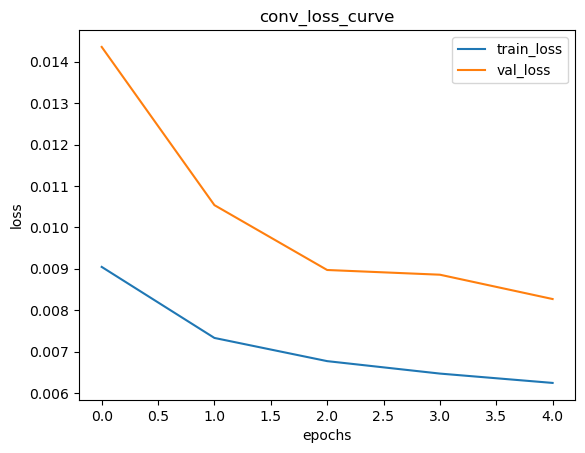

In [51]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("conv_loss_curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


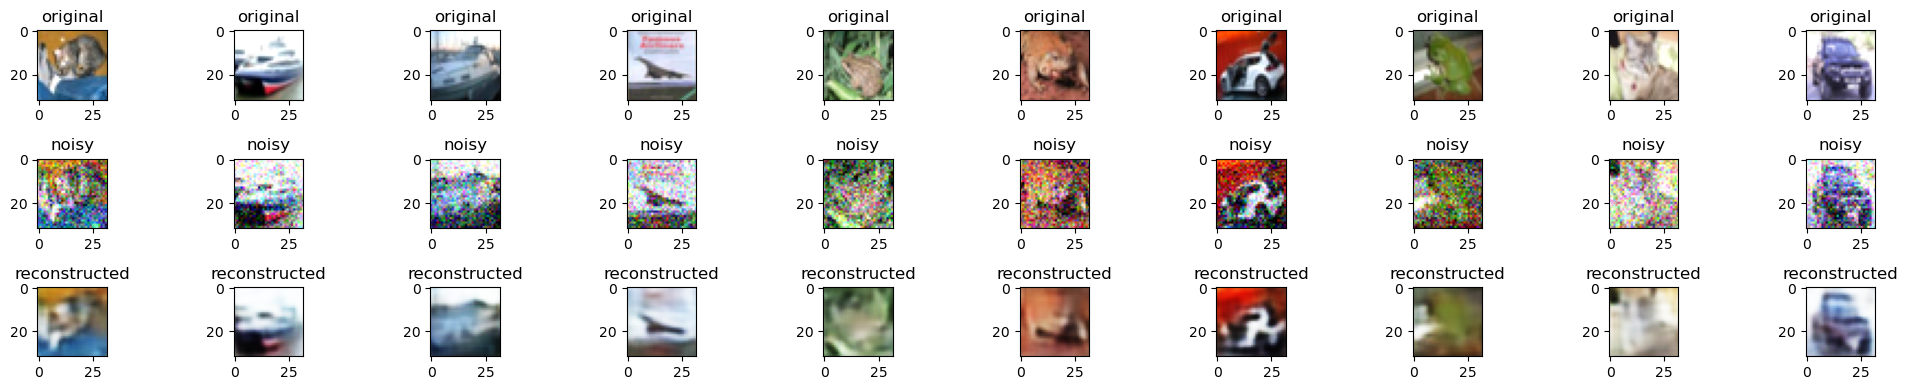

In [85]:
rec=autoencoder.predict(x_test_noise[:10])
plt.figure(figsize=(20, 4))
n=10
for i in range(10):
    ax=plt.subplot(3,n,i+1)
    plt.imshow(x_test[i])
    plt.title("original")

    ax=plt.subplot(3,n,n+i+1)
    plt.imshow(x_test_noise[i])
    plt.title("noisy")

    ax=plt.subplot(3,n,i+2*n+1)
    plt.imshow(rec[i])
    plt.title("reconstructed")
    
plt.tight_layout()
plt.show()
    

# MLP

In [93]:
inp_dim=np.prod((32,32,3))
enc_dim=256
input=Input(shape=(32,32,3))
flat_img=Flatten()(input)

encoded=Dense(512,activation="relu")(flat_img)
encoded=Dense(enc_dim,activation="relu")(encoded)

decoded=Dense(512,activation="relu")(encoded)
decoded=Dense(inp_dim,activation="sigmoid")(decoded)

output_img=Reshape((32,32,3))(decoded)
autoencoder=Model(input,output_img)
encoder=Model(input,encoded)
decoder=Model(encoded,output_img)
                

In [95]:
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3072)                │       1,575,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 32, 32, 3)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,412,224 (13.02 MB)

 Trainable params: 3,412,224 (13.02 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001),loss="mse")
earlystop=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
history=autoencoder.fit(x_train_noise,x_train,batch_size=100,epochs=5,callbacks=[earlystop],validation_data=(x_test_noise,x_test))

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - loss: 0.0374 - val_loss: 0.0231
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 0.0161 - val_loss: 0.0187
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - loss: 0.0136 - val_loss: 0.0170
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - loss: 0.0124 - val_loss: 0.0161
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - loss: 0.0115 - val_loss: 0.0156


In [101]:
autoencoder.evaluate(x_test_noise,x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0157


0.015625841915607452

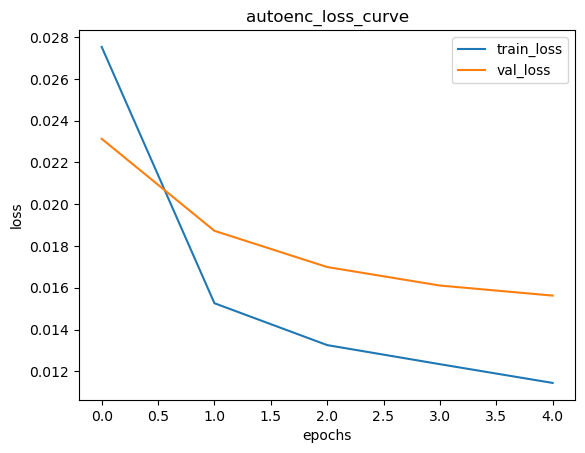

In [103]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("autoenc_loss_curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


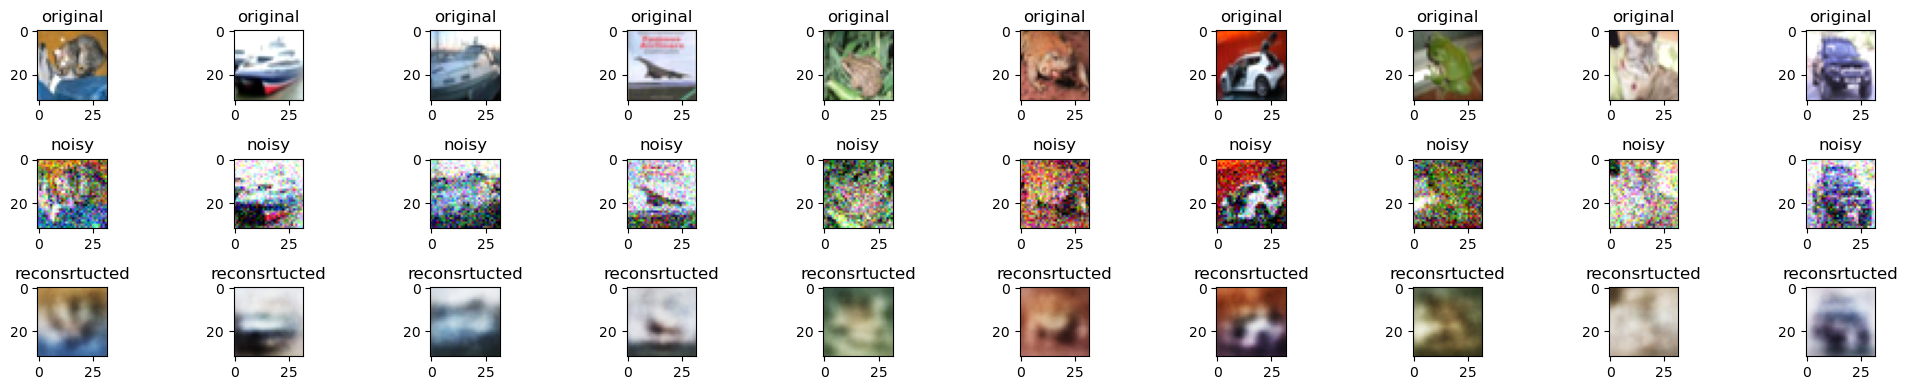

In [107]:
n=10
rec=autoencoder.predict(x_test_noise[:n])
plt.figure(figsize=(20,4))
for i in range(n):
    plt.subplot(3,n,i+1)
    plt.imshow(x_test[i])
    plt.title("original")
    
    plt.subplot(3,n,n+i+1)
    plt.imshow(x_test_noise[i])
    plt.title("noisy")
    
    plt.subplot(3,n,2*n+i+1)
    plt.imshow(rec[i])
    plt.title("reconsrtucted")
plt.tight_layout()
plt.show()